# READ AND WRITE IMAGE

In [2]:
import cv2

In [6]:
image = cv2.imread("sample.jpg")
image = cv2.resize(image, (300,300))

# GRAY IMAGE

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [30]:
cv2.imshow("orginal",image)
cv2.imshow("Gray Image",gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#image Write

In [16]:
cv2.imwrite("C:/Users/srabbijan/Documents/out.png",gray_image)

True

# translation

In [9]:

import numpy as np


In [31]:
height,weight = image.shape[:2]
q_height,q_weight = height/4,weight/4
T = np.float32([[1, 0, q_weight], [0, 1, q_height]]) 
img_translation = cv2.warpAffine(image, T, (weight, height)) 

cv2.imshow("Originalimage", image) 
cv2.imshow('Translation', img_translation)
#cv.imwrite('Translation.jpg', img_translation) 
cv2.waitKey() 
cv2.destroyAllWindows()

# SHARPING

In [32]:

cv2.imshow('AV CV- Winter Wonder1', image)

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
cv2.imshow('AV CV- Winter Wonder Sharpened', image_sharp)
cv2.waitKey()
cv2.destroyAllWindows()

# SCALING

In [36]:

cv2.imshow('Original', image)

img_half = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
cv2.imshow('Half Image', img_half)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotation 

In [13]:

ro_image = cv2.rotate(image, cv2.ROTATE_180)

cv2.imshow("ro_image", ro_image)
cv2.waitKey(0)

-1

# HISTOGRAM 

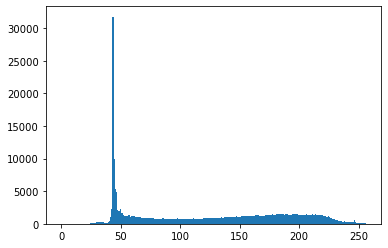

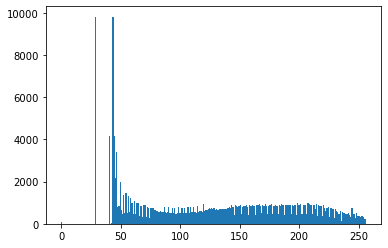

In [14]:

from matplotlib import pyplot as plt

plt.hist(image.ravel(),256,[0,256]) 

plt.show() 
#plt.savefig('hist.png')

equ = cv2.equalizeHist(gray_image)
res = np.hstack((gray_image,equ))

cv2.imshow('Equalized Image',res)
cv2.waitKey(0)
#cv2.imwrite('Equalized Image.png',res)

plt.hist(res.ravel(),256,[0,256]) 

plt.show() 
#plt.savefig('equal-hist.png')

# Morphological

In [15]:
img = cv2.imread("sample.jpg")
cv2.imshow("main",img)
cv2.waitKey(0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
cv2.imshow("erosion",erosion)
cv2.waitKey(0)
dilation = cv2.dilate(img,kernel,iterations = 1)
cv2.imshow("dialation",dilation)
cv2.waitKey(0)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2.imshow("opening",opening)
cv2.waitKey(0)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2.imshow("closing",closing)
cv2.waitKey(0)

-1

# Thressholding

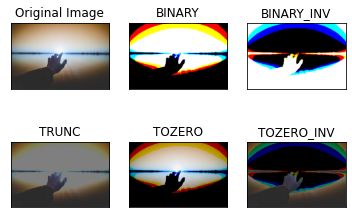

In [17]:

from matplotlib import pyplot as plt
img = cv2.imread("sample.jpg")
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Line, EDGE, Watershed Algorithm

In [20]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

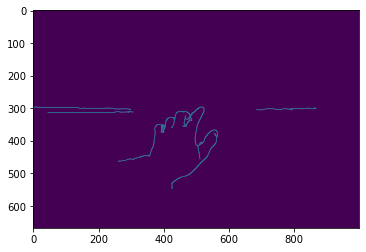

In [22]:
img = cv2.imread("sample.jpg")

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
plt.imshow(edges)


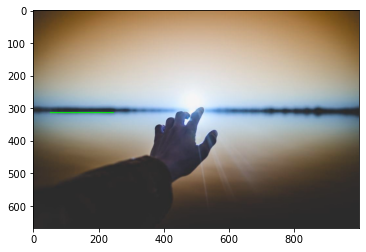

In [23]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,20,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img)

# Image Segmentation with Watershed Algorithm

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [37]:
img = cv2.imread('sample.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imshow("aaa",thresh)
cv2.waitKey(0)
#plt.imshow(thresh)

-1

# LZW

In [28]:
import numpy as np

# Considering only 4*4 images
intensity_array = np.zeros((4,4))

print("Enter the intensity array : ")

for i in range(0,4): 
    for j in range(0,4):
        intensity_array[i,j] = float(input())


rows = intensity_array.shape[0]
cols = intensity_array.shape[1]

int_string = np.zeros((rows*cols))
idx = 0

#Creating a string of all intensity values

for i in range(0,rows): 
    for j in range(0,cols):
        int_string[idx] = intensity_array[i,j]
        idx = idx+1
        

crs = "" ; # currently recognized sequence
curr = "" ; # current sequence

output = {}
out_idx = 0

dict_val = {}
dict_idx = 0

for i in range(0,255) :
    dict_val[str(i)] = i
        
#next unused location
dict_idx = 256

curr = int_string[0]

crs = str(int(curr))

for i in range(1,idx) :
    curr = int_string[i]
    
    t_str = crs + "-" + str(int(curr))
    
    #print("t_str is " + t_str)
    
    if t_str in dict_val :
        #print(t_str + " Already exists");
        crs = t_str;
    else:
        # if not found in the dictionary
    
        #print("Creating a new entry for the dictionary ")
        output[out_idx] = dict_val[crs]
        #print("Output " , + output[int(out_idx)])
        out_idx = out_idx + 1
        crs = str(int(curr))
        
        # add the new entery to the dictionary
        dict_val[t_str] = dict_idx
        dict_idx = dict_idx + 1
    

#Last entry will always be found in the dictionary
if crs in dict_val : 
    output[out_idx] = dict_val[crs]
    #print("Output " , + output[int(out_idx)])
    out_idx = out_idx + 1
    
#printing the encoded output
print(output.values())

Enter the intensity array : 
39
39
126
126
39
39
126
126
39
39
126
126
39
39
126
126
dict_values([39, 39, 126, 126, 256, 258, 260, 259, 257, 126])


# Huffman

In [29]:
# A Huffman Tree Node
class Node:
    def __init__(self, prob, symbol, left=None, right=None):
        # probability of symbol
        self.prob = prob

        # symbol 
        self.symbol = symbol

        # left node
        self.left = left

        # right node
        self.right = right

        # tree direction (0/1)
        self.code = ''

""" A helper function to print the codes of symbols by traveling Huffman Tree"""
codes = dict()

def Calculate_Codes(node, val=''):
    # huffman code for current node
    newVal = val + str(node.code)

    if(node.left):
        Calculate_Codes(node.left, newVal)
    if(node.right):
        Calculate_Codes(node.right, newVal)

    if(not node.left and not node.right):
        codes[node.symbol] = newVal
         
    return codes        

""" A helper function to calculate the probabilities of symbols in given data"""
def Calculate_Probability(data):
    symbols = dict()
    for element in data:
        if symbols.get(element) == None:
            symbols[element] = 1
        else: 
            symbols[element] += 1     
    return symbols

""" A helper function to obtain the encoded output"""
def Output_Encoded(data, coding):
    encoding_output = []
    for c in data:
      #  print(coding[c], end = '')
        encoding_output.append(coding[c])
        
    string = ''.join([str(item) for item in encoding_output])    
    return string
        
""" A helper function to calculate the space difference between compressed and non compressed data"""    
def Total_Gain(data, coding):
    before_compression = len(data) * 8 # total bit space to stor the data before compression
    after_compression = 0
    symbols = coding.keys()
    for symbol in symbols:
        count = data.count(symbol)
        after_compression += count * len(coding[symbol]) #calculate how many bit is required for that symbol in total
    print("Space usage before compression (in bits):", before_compression)    
    print("Space usage after compression (in bits):",  after_compression)           

def Huffman_Encoding(data):
    symbol_with_probs = Calculate_Probability(data)
    symbols = symbol_with_probs.keys()
    probabilities = symbol_with_probs.values()
    print("symbols: ", symbols)
    print("probabilities: ", probabilities)
    
    nodes = []
    
    # converting symbols and probabilities into huffman tree nodes
    for symbol in symbols:
        nodes.append(Node(symbol_with_probs.get(symbol), symbol))
    
    while len(nodes) > 1:
        # sort all the nodes in ascending order based on their probability
        nodes = sorted(nodes, key=lambda x: x.prob)
        # for node in nodes:  
        #      print(node.symbol, node.prob)
    
        # pick 2 smallest nodes
        right = nodes[0]
        left = nodes[1]
    
        left.code = 0
        right.code = 1
    
        # combine the 2 smallest nodes to create new node
        newNode = Node(left.prob+right.prob, left.symbol+right.symbol, left, right)
    
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(newNode)
            
    huffman_encoding = Calculate_Codes(nodes[0])
    print("symbols with codes", huffman_encoding)
    Total_Gain(data, huffman_encoding)
    encoded_output = Output_Encoded(data,huffman_encoding)
    return encoded_output, nodes[0]  
    
 
def Huffman_Decoding(encoded_data, huffman_tree):
    tree_head = huffman_tree
    decoded_output = []
    for x in encoded_data:
        if x == '1':
            huffman_tree = huffman_tree.right   
        elif x == '0':
            huffman_tree = huffman_tree.left
        try:
            if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                pass
        except AttributeError:
            decoded_output.append(huffman_tree.symbol)
            huffman_tree = tree_head
        
    string = ''.join([str(item) for item in decoded_output])
    return string        


""" First Test """
data = "AAAAAAABCCCCCCDDEEEEE"
print(data)
encoding, tree = Huffman_Encoding(data)
print("Encoded output", encoding)
print("Decoded Output", Huffman_Decoding(encoding,tree))


""" Second Test """

# f = open("demofile.txt", "r")

# data = f.read()
# print(data)
# Huffman_Encoding(data)

AAAAAAABCCCCCCDDEEEEE
symbols:  dict_keys(['A', 'B', 'C', 'D', 'E'])
probabilities:  dict_values([7, 1, 6, 2, 5])
symbols with codes {'A': '00', 'C': '01', 'E': '10', 'D': '110', 'B': '111'}
Space usage before compression (in bits): 168
Space usage after compression (in bits): 45
Encoded output 000000000000001110101010101011101101010101010
Decoded Output AAAAAAABCCCCCCDDEEEEE


' Second Test '